# Graphiques python pour l'EDO Scalaire du premier ordre
## Optimisation du pas d'integration


 > fichier data/euler_3.7.txt : 3 lignes d'entete
 > fichier data/pm_3.7.txt : 3 lignes d'entete
 > fichier data/rk4_3.7.txt : 3 lignes d'entete
 < Le graphique data/euler_3.7.pdf a ete cree.
   	Vous pouvez le visualiser avec :  okular data/euler_3.7.pdf


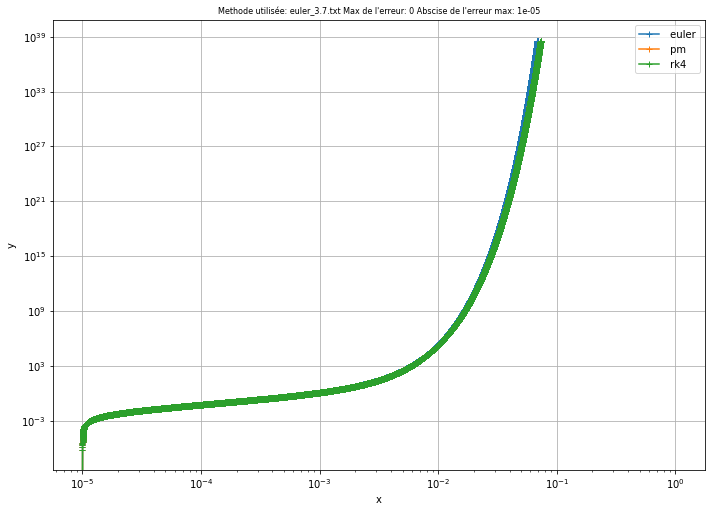

<Figure size 432x288 with 0 Axes>

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Variable a modifier avant execution
nomfichier  = "data/euler_3.7.txt" # <== fichier de donnees
nomfichier2 = "data/pm_3.7.txt"
nomfichier3 = "data/rk4_3.7.txt"


# Récupération du nom de la fonction tabulée
fonction_tab = nomfichier[ : nomfichier.rfind(".")]
fonction_tab2 = nomfichier2[ : nomfichier2.rfind(".")]
fonction_tab3 = nomfichier3[ : nomfichier3.rfind(".")]
nomgraph = fonction_tab+".pdf" #  idem fic. entree avec extension .pdf

try:      # ouverture du fichier de donnees
  fich = open(nomfichier, "r")
  fich2 = open (nomfichier2, "r")
  fich3 = open (nomfichier3, "r")
except:
  print(" ! Impossible d'ouvrir le fichier %s."%nomfichier )
  print(" ! Verifier le chemin.\n")
  exit()

# Lecture des lignes d'entete du fichier 1

ligne = fich.readline().replace("\n","") # sans caractere de fin de ligne
entete= [ ]
while( ligne[0] == "#" ):
   entete.append( ligne[1:] )
   ligne =  fich.readline().replace("\n","")
fich.close()
print( " > fichier %s : %d lignes d'entete"%( nomfichier, len(entete) ) )

# Lecture des lignes d'entete du fichier 2
ligne2 = fich2.readline().replace("\n","") # sans caractere de fin de ligne
entete2= [ ]
while( ligne2[0] == "#" ):
   entete2.append( ligne2[1:] )
   ligne2 =  fich2.readline().replace("\n","")
fich2.close()
print( " > fichier %s : %d lignes d'entete"%( nomfichier2, len(entete2) ) )

# Lecture des lignes d'entete du fichier 3
ligne3 = fich3.readline().replace("\n","") # sans caractere de fin de ligne
entete3= [ ]
while( ligne3[0] == "#" ):
   entete3.append( ligne3[1:] )
   ligne3 =  fich3.readline().replace("\n","")
fich3.close()
print( " > fichier %s : %d lignes d'entete"%( nomfichier3, len(entete3) ) )


# concatenation des entetes en une seule ligne de titre :
titre = " ".join(entete)

# Lecture des donnees du fichier :
tab = np.loadtxt( nomfichier, dtype="float")
tab2 = np.loadtxt( nomfichier2, dtype="float")
tab3 = np.loadtxt( nomfichier3, dtype="float")

# Creation des listes d'abscisses/ordonnees : 1ere et 2eme colonnes
x  = tab[:,0]
y  = tab[:,3]

x2 = tab2[:,0]
y2 = tab2[:,3]

x3 = tab3[:,0]
y3 = tab3[:,3]

# Creation du graphique
plt.figure( figsize=(11.69, 8.27) ) # taille en inches : A4 paysage
plt.title( titre, fontsize=8)
plt.grid()


#Labels des fichiers
label_1 = entete[0][ entete[0].rfind(":") + 1 : entete[0].rfind("_")] 
label_2 = entete2[0][ entete2[0].rfind(":") + 1 : entete2[0].rfind("_")]
label_3 = entete3[0][ entete3[0].rfind(":") + 1 : entete3[0].rfind("_")]

plt.loglog(x,y,  marker = '+', label=label_1)
plt.loglog(x,y2, marker = '+', label=label_2)
plt.loglog(x,y3, marker = '+', label=label_3)
plt.xlabel("x")                                   # <== variable d'abscisse
plt.ylabel("y")                                   # <== variable d'ordonnee


plt.autoscale(enable=True, axis='both', tight=None)
#plt.xlim(1e-6,1e-2)
#plt.ylim(0,20)
plt.legend()
fig = plt.gcf()
fig.savefig(nomgraph) # sauvegarde du fichier au format PDF
print(" < Le graphique %s a ete cree."%(nomgraph) )
print("   \tVous pouvez le visualiser avec :  okular %s"%(nomgraph))

plt.show()
plt.clf() # nettoyage ('clear figure')
